In [ ]:
import os
os.chdir('/content/drive/MyDrive/Colab Notebooks')


In [ ]:
# импорт модулей
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np
import sklearn

In [ ]:
# загрузка датасета
from keras.datasets import mnist
(X_train, y_train), (X_test, y_test) = mnist.load_data()


11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


In [ ]:
# создание своего разбиения датасета
from sklearn.model_selection import train_test_split

In [ ]:
# объединяем в один набор
X = np.concatenate((X_train, X_test))
y = np.concatenate((y_train, y_test))


In [ ]:
# разбиваем по вариантам
X_train, X_test, y_train, y_test = train_test_split(X, y,
 test_size = 10000,
 train_size = 60000,
 random_state = 27)


In [ ]:
# вывод размерностей
print('Shape of X train:', X_train.shape)
print('Shape of y train:', y_train.shape)


Shape of X train: (60000, 28, 28)
Shape of y train: (60000,)


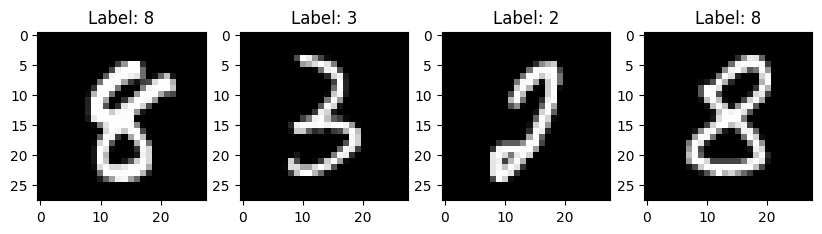

In [ ]:
# Создаем subplot для 4 изображений
fig, axes = plt.subplots(1, 4, figsize=(10, 3))

for i in range(4):
    axes[i].imshow(X_train[i], cmap=plt.get_cmap('gray'))
    axes[i].set_title(f'Label: {y_train[i]}')

In [ ]:
# Добавляем метку как заголовок

plt.show()

In [ ]:
# развернем каждое изображение 28*28 в вектор 784
num_pixels = X_train.shape[1] * X_train.shape[2]
X_train = X_train.reshape(X_train.shape[0], num_pixels) / 255
X_test = X_test.reshape(X_test.shape[0], num_pixels) / 255
print('Shape of transformed X train:', X_train.shape)


Shape of transformed X train: (60000, 784)


In [ ]:
# переведем метки в one-hot
from keras.utils import to_categorical
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)
print('Shape of transformed y train:', y_train.shape)
num_classes = y_train.shape[1]


Shape of transformed y train: (60000, 10)


In [ ]:
from keras.models import Sequential
from keras.layers import Dense

In [ ]:
model_1 = Sequential()
model_1.add(Dense(units=num_classes,input_dim=num_pixels, activation='softmax'))

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model_1.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])

print("Архитектура нейронной сети:")
model_1.summary()

Архитектура нейронной сети:


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 10)             │         7,850 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 7,850 (30.66 KB)

 Trainable params: 7,850 (30.66 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# Обучаем модель
history = model_1.fit(
    X_train, y_train,
    validation_split=0.1,
    epochs=50
)

Epoch 1/50
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.7168 - loss: 1.1499 - val_accuracy: 0.8695 - val_loss: 0.5093
Epoch 2/50
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8763 - loss: 0.4841 - val_accuracy: 0.8858 - val_loss: 0.4226
Epoch 3/50
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8890 - loss: 0.4170 - val_accuracy: 0.8953 - val_loss: 0.3855
Epoch 4/50
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.8923 - loss: 0.3911 - val_accuracy: 0.8990 - val_loss: 0.3649
Epoch 5/50
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8989 - loss: 0.3692 - val_accuracy: 0.9032 - val_loss: 0.3503
Epoch 6/50
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9034 - loss: 0.3525 - val_accuracy: 0.9055 - val_loss: 0.3410
Epoch 7/50
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9026 - loss: 0.3452 - val_accuracy: 0.9080 - val_loss: 0.3325
Epoch 8/50
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9063 - loss: 0.3369 - 

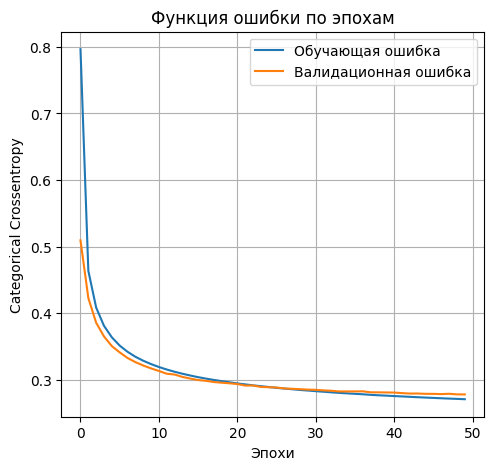

In [ ]:
# Выводим график функции ошибки
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Обучающая ошибка')
plt.plot(history.history['val_loss'], label='Валидационная ошибка')
plt.title('Функция ошибки по эпохам')
plt.xlabel('Эпохи')
plt.ylabel('Categorical Crossentropy')
plt.legend()
plt.grid(True)

In [ ]:
scores=model_1.evaluate(X_test,y_test)
print('Lossontestdata:',scores[0])
print('Accuracyontestdata:',scores[1])


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9206 - loss: 0.2956
Lossontestdata: 0.2900226414203644
Accuracyontestdata: 0.9222000241279602


In [ ]:
#Пункт 8
model_2l_100 = Sequential()
model_2l_100.add(Dense(units=100,input_dim=num_pixels, activation='sigmoid'))
model_2l_100.add(Dense(units=num_classes, activation='softmax'))
# 2. компилируем модель
model_2l_100.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])

In [ ]:
print("Архитектура нейронной сети:")
model_2l_100.summary()

Архитектура нейронной сети:


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_1 (Dense)                 │ (None, 100)            │        78,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │         1,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 79,510 (310.59 KB)

 Trainable params: 79,510 (310.59 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# Обучаем модель
history_2l_100 = model_2l_100.fit(
    X_train, y_train,
    validation_split=0.1,
    epochs=50
)

Epoch 1/50
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.5185 - loss: 1.9076 - val_accuracy: 0.8188 - val_loss: 0.9700
Epoch 2/50
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8349 - loss: 0.8532 - val_accuracy: 0.8565 - val_loss: 0.6222
Epoch 3/50
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8649 - loss: 0.5911 - val_accuracy: 0.8718 - val_loss: 0.4999
Epoch 4/50
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8795 - loss: 0.4889 - val_accuracy: 0.8837 - val_loss: 0.4374
Epoch 5/50
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8879 - loss: 0.4305 - val_accuracy: 0.8913 - val_loss: 0.4000
Epoch 6/50
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8955 - loss: 0.3942 - val_accuracy: 0.8972 - val_loss: 0.3744
Epoch 7/50
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8999 - loss: 0.3707 - val_accuracy: 0.9007 - val_loss: 0.3557
Epoch 8/50
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9011 - loss: 0.3581 - 

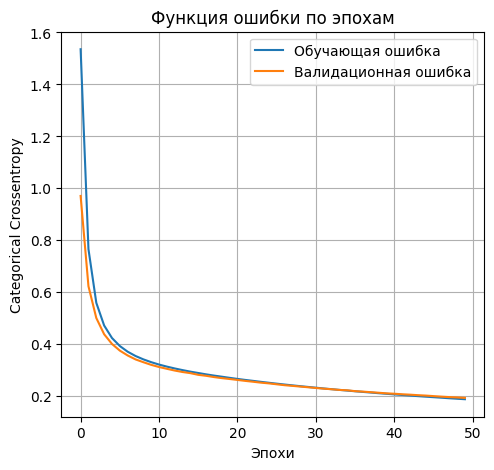

In [ ]:
# Выводим график функции ошибки
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(history_2l_100.history['loss'], label='Обучающая ошибка')
plt.plot(history_2l_100.history['val_loss'], label='Валидационная ошибка')
plt.title('Функция ошибки по эпохам')
plt.xlabel('Эпохи')
plt.ylabel('Categorical Crossentropy')
plt.legend()
plt.grid(True)

In [ ]:
scores_2l_100=model_2l_100.evaluate(X_test,y_test)
print('Lossontestdata:',scores_2l_100[0])
print('Accuracyontestdata:',scores_2l_100[1])

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9436 - loss: 0.2091
Lossontestdata: 0.20427274703979492
Accuracyontestdata: 0.9438999891281128


In [ ]:
#Пункт 8
model_2l_300 = Sequential()
model_2l_300.add(Dense(units=300,input_dim=num_pixels, activation='sigmoid'))
model_2l_300.add(Dense(units=num_classes, activation='softmax'))
# 2. компилируем модель
model_2l_300.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])

In [ ]:
print("Архитектура нейронной сети:")
model_2l_300.summary()


Архитектура нейронной сети:


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_5 (Dense)                 │ (None, 300)            │       235,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 10)             │         3,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 238,510 (931.68 KB)

 Trainable params: 238,510 (931.68 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# Обучаем модель
history_2l_300 = model_2l_300.fit(
    X_train, y_train,
    validation_split=0.1,
    epochs=50
)

Epoch 1/50
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.5528 - loss: 1.7901 - val_accuracy: 0.8203 - val_loss: 0.8592
Epoch 2/50
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8386 - loss: 0.7584 - val_accuracy: 0.8618 - val_loss: 0.5684
Epoch 3/50
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8667 - loss: 0.5470 - val_accuracy: 0.8748 - val_loss: 0.4692
Epoch 4/50
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8820 - loss: 0.4562 - val_accuracy: 0.8857 - val_loss: 0.4180
Epoch 5/50
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8882 - loss: 0.4171 - val_accuracy: 0.8907 - val_loss: 0.3849
Epoch 6/50
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8947 - loss: 0.3853 - val_accuracy: 0.8945 - val_loss: 0.3657
Epoch 7/50
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8986 - loss: 0.3605 - val_accuracy: 0.9007 - val_loss: 0.3484
Epoch 8/50
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9029 - loss: 0.3491 - 

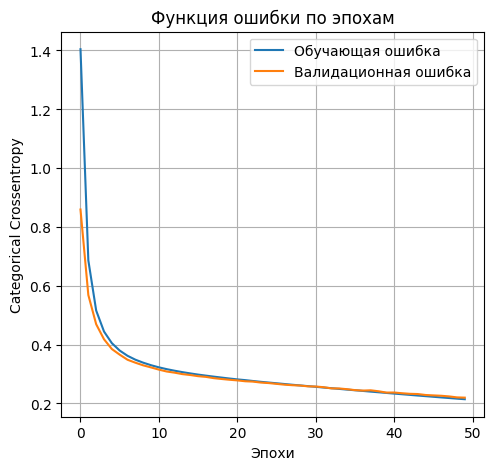

In [ ]:
# Выводим график функции ошибки
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(history_2l_300.history['loss'], label='Обучающая ошибка')
plt.plot(history_2l_300.history['val_loss'], label='Валидационная ошибка')
plt.title('Функция ошибки по эпохам')
plt.xlabel('Эпохи')
plt.ylabel('Categorical Crossentropy')
plt.legend()
plt.grid(True)


In [ ]:
scores_2l_300=model_2l_300.evaluate(X_test,y_test)
print('Lossontestdata:',scores_2l_300[0])
print('Accuracyontestdata:',scores_2l_300[1])

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9365 - loss: 0.2352
Lossontestdata: 0.23040874302387238
Accuracyontestdata: 0.9372000098228455


In [ ]:
#Пункт 8
model_2l_500 = Sequential()
model_2l_500.add(Dense(units=500,input_dim=num_pixels, activation='sigmoid'))
model_2l_500.add(Dense(units=num_classes, activation='softmax'))
# 2. компилируем модель
model_2l_500.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])

In [ ]:
print("Архитектура нейронной сети:")
model_2l_500.summary()

Архитектура нейронной сети:


Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_7 (Dense)                 │ (None, 500)            │       392,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 10)             │         5,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 397,510 (1.52 MB)

 Trainable params: 397,510 (1.52 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# Обучаем модель
history_2l_500 = model_2l_500.fit(
    X_train, y_train,
    validation_split=0.1,
    epochs=50
)

Epoch 1/50
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.5493 - loss: 1.7652 - val_accuracy: 0.8298 - val_loss: 0.8146
Epoch 2/50
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8435 - loss: 0.7186 - val_accuracy: 0.8608 - val_loss: 0.5514
Epoch 3/50
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8698 - loss: 0.5216 - val_accuracy: 0.8768 - val_loss: 0.4572
Epoch 4/50
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8831 - loss: 0.4475 - val_accuracy: 0.8865 - val_loss: 0.4084
Epoch 5/50
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8879 - loss: 0.4108 - val_accuracy: 0.8918 - val_loss: 0.3823
Epoch 6/50
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8930 - loss: 0.3828 - val_accuracy: 0.8972 - val_loss: 0.3626
Epoch 7/50
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8983 - loss: 0.3595 - val_accuracy: 0.9015 - val_loss: 0.3486
Epoch 8/50
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9001 - loss: 0.3542 - 

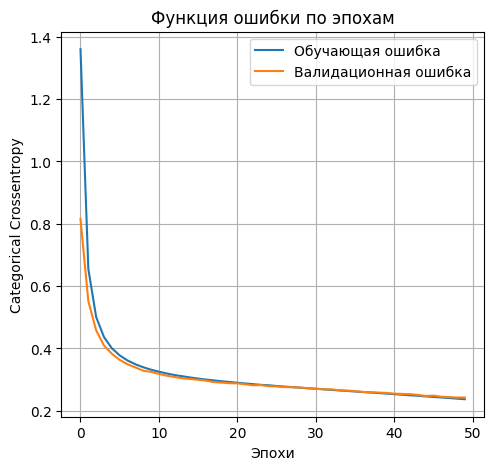

In [ ]:
# Выводим график функции ошибки
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(history_2l_500.history['loss'], label='Обучающая ошибка')
plt.plot(history_2l_500.history['val_loss'], label='Валидационная ошибка')
plt.title('Функция ошибки по эпохам')
plt.xlabel('Эпохи')
plt.ylabel('Categorical Crossentropy')
plt.legend()
plt.grid(True)


In [ ]:
scores_2l_500=model_2l_500.evaluate(X_test,y_test)
print('Lossontestdata:',scores_2l_500[0])
print('Accuracyontestdata:',scores_2l_500[1])

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9290 - loss: 0.2572
Lossontestdata: 0.25275251269340515
Accuracyontestdata: 0.9301000237464905


Лучшая метрика - Accuracyontestdata : 0.9438999891281128, при архитектуре со 100 нейронами.

In [ ]:
#9 пункт
model_3l_100_50 = Sequential()
model_3l_100_50.add(Dense(units=100, input_dim=num_pixels, activation='sigmoid'))
model_3l_100_50.add(Dense(units=50, activation='sigmoid'))
model_3l_100_50.add(Dense(units=num_classes, activation='softmax'))

model_3l_100_50.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])

In [ ]:
print("Архитектура нейронной сети:")
model_3l_100_50.summary()

Архитектура нейронной сети:


Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_9 (Dense)                 │ (None, 100)            │        78,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 50)             │         5,050 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 10)             │           510 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 84,060 (328.36 KB)

 Trainable params: 84,060 (328.36 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# Обучаем модель
history_3l_100_50 = model_3l_100_50.fit(
    X_train, y_train,
    validation_split=0.1,
    epochs=50
)

Epoch 1/50
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.2184 - loss: 2.2653 - val_accuracy: 0.4402 - val_loss: 2.0564
Epoch 2/50
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.5373 - loss: 1.9305 - val_accuracy: 0.6475 - val_loss: 1.4814
Epoch 3/50
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.6621 - loss: 1.3505 - val_accuracy: 0.7543 - val_loss: 1.0269
Epoch 4/50
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.7630 - loss: 0.9652 - val_accuracy: 0.8047 - val_loss: 0.7883
Epoch 5/50
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8158 - loss: 0.7571 - val_accuracy: 0.8412 - val_loss: 0.6438
Epoch 6/50
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8455 - loss: 0.6224 - val_accuracy: 0.8575 - val_loss: 0.5530
Epoch 7/50
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8636 - loss: 0.5428 - val_accuracy: 0.8652 - val_loss: 0.4939
Epoch 8/50
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8749 - loss: 0.4841 - 

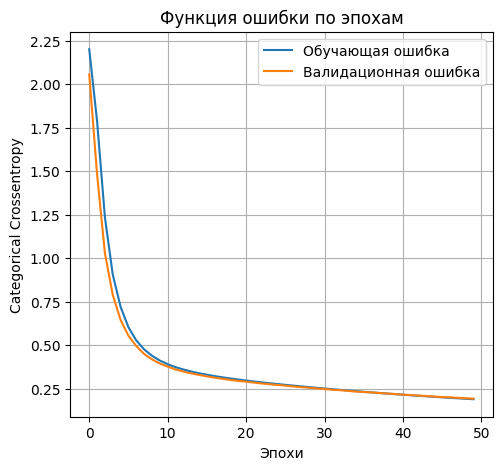

In [ ]:
# Выводим график функции ошибки
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(history_3l_100_50.history['loss'], label='Обучающая ошибка')
plt.plot(history_3l_100_50.history['val_loss'], label='Валидационная ошибка')
plt.title('Функция ошибки по эпохам')
plt.xlabel('Эпохи')
plt.ylabel('Categorical Crossentropy')
plt.legend()
plt.grid(True)

In [ ]:
scores_3l_100_50=model_3l_100_50.evaluate(X_test,y_test)
print('Lossontestdata:',scores_3l_100_50[0])
print('Accuracyontestdata:',scores_3l_100_50[1])

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9423 - loss: 0.2074
Lossontestdata: 0.20320768654346466
Accuracyontestdata: 0.9427000284194946


In [ ]:
#9 пункт
model_3l_100_100 = Sequential()
model_3l_100_100.add(Dense(units=100, input_dim=num_pixels, activation='sigmoid'))
model_3l_100_100.add(Dense(units=100, activation='sigmoid'))
model_3l_100_100.add(Dense(units=num_classes, activation='softmax'))

model_3l_100_100.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])

In [ ]:
print("Архитектура нейронной сети:")
model_3l_100_100.summary()


Архитектура нейронной сети:


Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_12 (Dense)                │ (None, 100)            │        78,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ (None, 10)             │         1,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 89,610 (350.04 KB)

 Trainable params: 89,610 (350.04 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# Обучаем модель
history_3l_100_100 = model_3l_100_100.fit(
    X_train, y_train,
    validation_split=0.1,
    epochs=50
)

Epoch 1/50
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.2217 - loss: 2.2757 - val_accuracy: 0.4550 - val_loss: 2.0754
Epoch 2/50
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.5328 - loss: 1.9426 - val_accuracy: 0.6695 - val_loss: 1.4533
Epoch 3/50
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.6905 - loss: 1.3098 - val_accuracy: 0.7663 - val_loss: 0.9693
Epoch 4/50
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.7778 - loss: 0.9031 - val_accuracy: 0.8193 - val_loss: 0.7365
Epoch 5/50
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8182 - loss: 0.7111 - val_accuracy: 0.8360 - val_loss: 0.6098
Epoch 6/50
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8400 - loss: 0.5970 - val_accuracy: 0.8538 - val_loss: 0.5323
Epoch 7/50
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8530 - loss: 0.5334 - val_accuracy: 0.8658 - val_loss: 0.4795
Epoch 8/50
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8729 - loss: 0.4714 - 

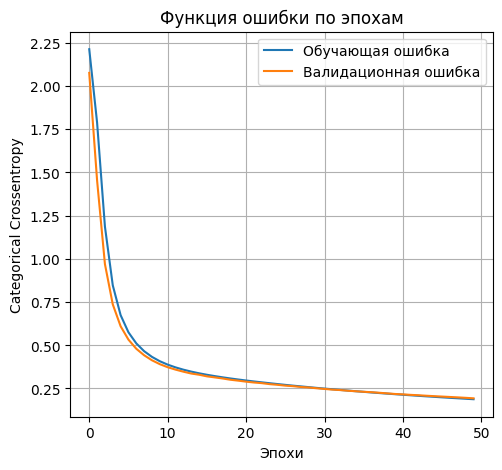

In [ ]:
# Выводим график функции ошибки
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(history_3l_100_100.history['loss'], label='Обучающая ошибка')
plt.plot(history_3l_100_100.history['val_loss'], label='Валидационная ошибка')
plt.title('Функция ошибки по эпохам')
plt.xlabel('Эпохи')
plt.ylabel('Categorical Crossentropy')
plt.legend()
plt.grid(True)

In [ ]:
scores_3l_100_100=model_3l_100_100.evaluate(X_test,y_test)
print('Lossontestdata:',scores_3l_100_100[0])
print('Accuracyontestdata:',scores_3l_100_100[1])

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9435 - loss: 0.2058
Lossontestdata: 0.2007063776254654
Accuracyontestdata: 0.9431999921798706


In [ ]:
import pandas as pd

data = {
    'Слои': [ 1, 1, 1, 2, 2],
    'Нейроны 1': [ 100, 300, 500, 100, 100],
    'Нейроны 2': [ '-', '-', '-', 50, 100],
    'Метрика': [ 0.9438999891281128, 0.9372000098228455, 0.9301000237464905, 0.9427000284194946, 0.9431999921798706]
}

df = pd.DataFrame(data)
df

Слои  Нейроны 1 Нейроны 2  Метрика
0     1        100         -   0.9439
1     1        300         -   0.9372
2     1        500         -   0.9301
3     2        100        50   0.9427
4     2        100       100   0.9432

In [ ]:
model_2l_100.save(filepath='best_model.keras')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 266ms/step
NN output: [[3.86779779e-04 3.69515050e-08 2.03053992e-06 1.15266894e-05
  1.57332561e-05 4.79512411e-04 7.92529917e-08 9.95542467e-01
  1.50878295e-05 3.54681048e-03]]


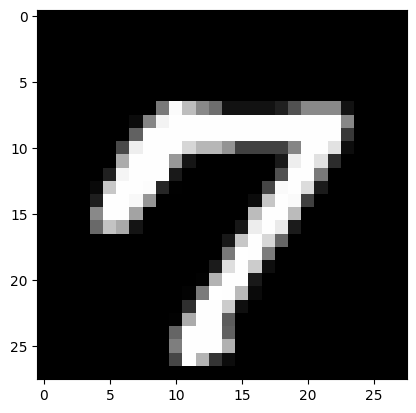

Real mark:  7
NN answer:  7


In [ ]:
# вывод тестового изображения и результата распознавания
n = 150
result = model_2l_100.predict(X_test[n:n+1])
print('NN output:', result)

plt.imshow(X_test[n].reshape(28,28), cmap=plt.get_cmap('gray'))
plt.show()
print('Real mark: ', str(np.argmax(y_test[n])))
print('NN answer: ', str(np.argmax(result)))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
NN output: [[8.1927046e-06 9.8501807e-01 4.7102575e-03 1.5754283e-03 5.3024664e-06
  2.3075400e-03 6.3471968e-04 7.6599965e-05 5.5682263e-03 9.5791329e-05]]


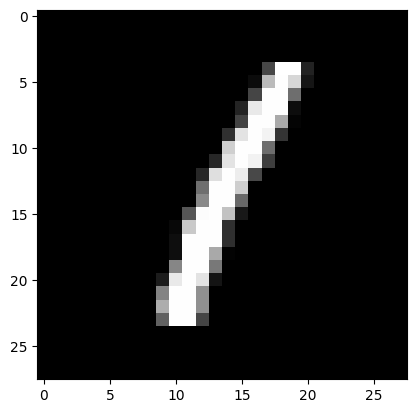

Real mark:  1
NN answer:  1


In [ ]:
# вывод тестового изображения и результата распознавания
n = 810
result = model_2l_100.predict(X_test[n:n+1])
print('NN output:', result)

plt.imshow(X_test[n].reshape(28,28), cmap=plt.get_cmap('gray'))
plt.show()
print('Real mark: ', str(np.argmax(y_test[n])))
print('NN answer: ', str(np.argmax(result)))


In [ ]:
#загрузка собственного изображения
from PIL import Image
file_1_data = Image.open('ИИЛР1_6.png')
file_1_data = file_1_data.convert('L') #перевод в градации серого
test_1_img = np.array(file_1_data)

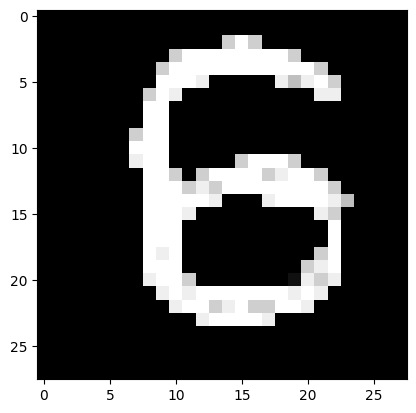

In [ ]:
#вывод собственного изображения
plt.imshow(test_1_img, cmap=plt.get_cmap('gray'))
plt.show()

In [ ]:
#предобработка
test_1_img = test_1_img / 255
test_1_img = test_1_img.reshape(1, num_pixels)


In [ ]:
#распознавание
result_1 = model_2l_100.predict(test_1_img)
print('I think it\'s', np.argmax(result_1))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
I think it's 6


In [ ]:
#загрузка собственного изображения
from PIL import Image
file_2_data = Image.open('ИИЛР1_1.png')
file_2_data = file_2_data.convert('L') #перевод в градации серого
test_2_img = np.array(file_2_data)

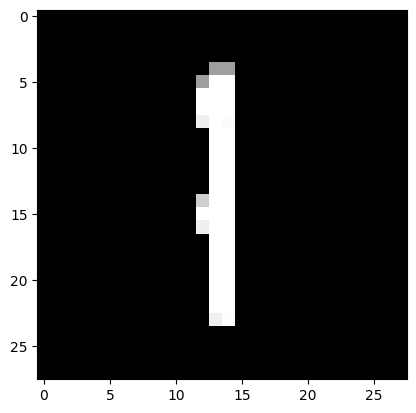

In [ ]:
#вывод собственного изображения
plt.imshow(test_2_img, cmap=plt.get_cmap('gray'))
plt.show()

In [ ]:
#предобработка
test_2_img = test_2_img / 255
test_2_img = test_2_img.reshape(1, num_pixels)

In [ ]:
#распознавание
result_2 = model_2l_100.predict(test_2_img)
print('I think it\'s', np.argmax(result_2))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
I think it's 1


In [ ]:
from PIL import Image
file_190_data = Image.open('ИИЛР1_690.png')
file_190_data = file_190_data.convert('L') #перевод в градации серого
test_190_img = np.array(file_190_data)

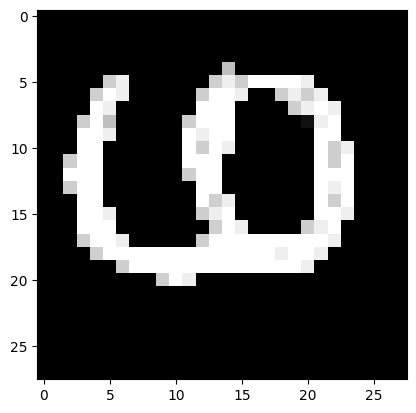

In [ ]:
plt.imshow(test_190_img, cmap=plt.get_cmap('gray'))
plt.show()

In [ ]:
#предобработка
test_190_img = test_190_img / 255
test_190_img = test_190_img.reshape(1, num_pixels)

In [ ]:
#распознавание
result_190 = model_2l_100.predict(test_190_img)
print('I think it\'s', np.argmax(result_190))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
I think it's 2


In [ ]:
from PIL import Image
file_290_data = Image.open('ИИЛР1_190.png')
file_290_data = file_290_data.convert('L') #перевод в градации серого
test_290_img = np.array(file_290_data)

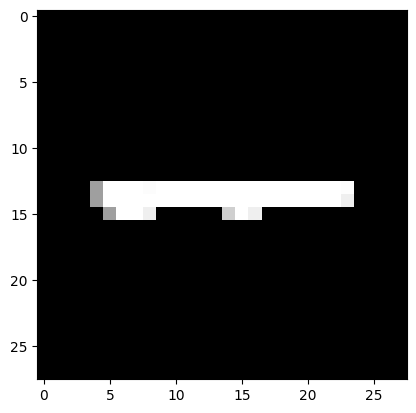

In [ ]:
plt.imshow(test_290_img, cmap=plt.get_cmap('gray'))
plt.show()

In [ ]:
#предобработка
test_290_img = test_290_img / 255
test_290_img = test_290_img.reshape(1, num_pixels)

In [ ]:
#распознавание
result_290 = model_2l_100.predict(test_290_img)
print('I think it\'s', np.argmax(result_290))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
I think it's 4
